<a href="https://colab.research.google.com/github/johnnycleiton07/image-processing/blob/main/morphological_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#**PROCESSAMENTO MORFOLÓGICO DE IMAGENS**

## Processamento Digital de Imagens

Ciência da Computação 


</center>

# Processamento Morfológico

- A área de **morfologia matemática** é utilizada como ferramenta para extrair componentes das imagens que são úteis na representação e na descrição da forma de uma região. 

- As operações morfológicas mais utilizadas são: **Erosão** e **Dilatação** que podem ser combinadas para fazer as operações de **Abertura** e **Fechamento**.

  - Nas operações, geralmente, primeiro é feita uma binarização da imagem a ser processada (levando em conta que é mais complicado trabalhar com imagens em escala de cinza ou em cores); 
  
  - Em seguida, é aplicado um operador conhecido como **elemento estruturante** que vai percorrer a imagem, analisando cada pixel e seus vizinhos, buscando propriedades de interesse;

  - Após a realização da operação, o resultado será uma imagem morfologicamente transformada e com o mesmo tamanho da imagem original.


### Operações Morfológicas em Python

In [17]:
#acessando arquivos no google drive
from google.colab import drive
drive.mount('/content/drive')

#importando as bibliotecas
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

image_path = "/content/drive/MyDrive/Colab Notebooks/images/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


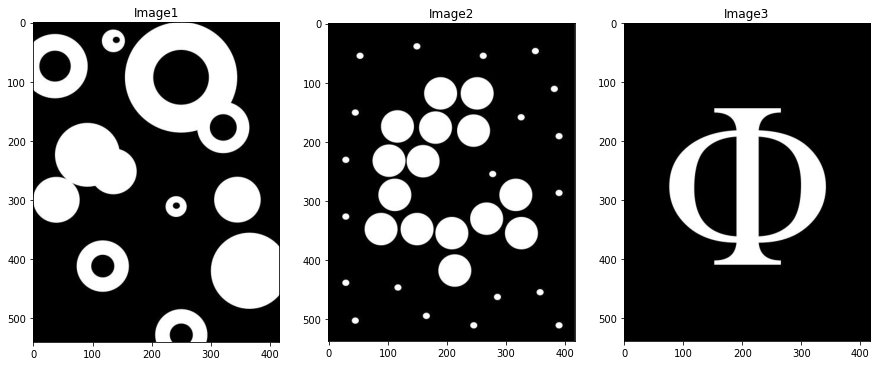

In [18]:
#leitura das imagens a serem utilizadas (já em formato binário)

image1 = cv2.imread((image_path + "balls.jpg"), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread((image_path + "circles.jpg"), cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread((image_path + "phi.jpg"), cv2.IMREAD_GRAYSCALE)

image = plt.figure(figsize=(5*3, 4*3), constrained_layout=False)

img1 = image.add_subplot(1, 3, 1)
img1.imshow(image1, cmap="gray"),plt.title("Image1")
img2 = image.add_subplot(1, 3, 2)
img2.imshow(image2, cmap="gray"),plt.title("Image2")
img3 = image.add_subplot(1, 3, 3)
img3.imshow(image3, cmap="gray"),plt.title("Image3")
plt.show()



---


#### Elementos Estruturantes

- Ao trabalhar com imagens, é necessário que os elementos estruturantes sejam **arranjos matriciais retângulares**. Para deixar o elemento estruturante retangular, é adicionando o menor número possível de elementos de fundo:

<center>
<img src="https://drive.google.com/uc?id=1xNjAFgQZ37YjiTap5cay3UPQ0kYWFMNf">
</center>


In [19]:
#elementos estruturantes

cruz = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)) 
retangulo = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
retVertical = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 7))
elipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

print (cruz, '\n')
print (retangulo, '\n')
print (retVertical, '\n')
print (elipse, '\n')

[[0 1 0]
 [1 1 1]
 [0 1 0]] 

[[1 1 1]
 [1 1 1]
 [1 1 1]] 

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]] 

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]] 





---


### Erosão
- Diminui partículas
- Aumenta buracos
- Separa componentes conectados
- Elimina componentes menores que o elemento estruturante

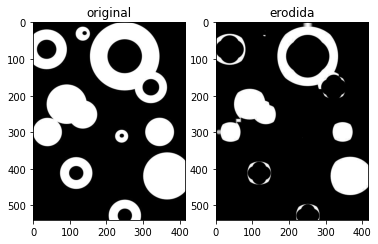

In [20]:
#escolha da imagem e elemento estruturante

img = image1
elemento = cv2.getStructuringElement(cv2.MORPH_CROSS, (25, 25))

#operação de erosão
erosao = cv2.erode(img, elemento)

plt.subplot(1, 2, 1), plt.imshow(img, 'gray'),plt.title('original')
plt.subplot(1, 2, 2), plt.imshow(erosao, 'gray'),plt.title('erodida')
plt.show()

### Dilatação
- Expande partículas
- Preenche buracos
- Conecta componentes próximos

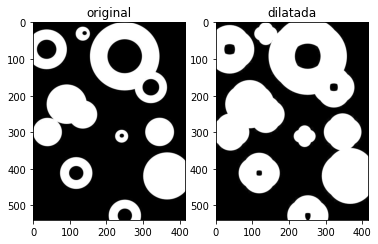

In [21]:
#escolha da imagem e elemento estruturante

img = image1
elemento = cv2.getStructuringElement(cv2.MORPH_CROSS, (25, 25))

#operação de dilatação
dilatacao = cv2.dilate(img, elemento)

plt.subplot(1, 2, 1), plt.imshow(img, 'gray'),plt.title('original')
plt.subplot(1, 2, 2), plt.imshow(dilatacao, 'gray'),plt.title('dilatada')
plt.show()

### Abertura
- Erosão seguida de Dilatação
- Elimina pequenos componentes e suaviza o contorno

OBS: quando uma característica some na erosão, não é refeita com a dilatação.

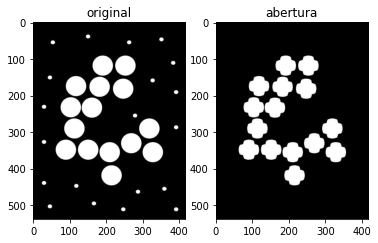

In [22]:
#escolha da imagem e elemento estruturante

img = image2
elemento = cv2.getStructuringElement(cv2.MORPH_CROSS, (25, 25))

#operação de abertura
abertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, elemento)

plt.subplot(1, 2, 1), plt.imshow(img, 'gray'),plt.title('original')
plt.subplot(1, 2, 2), plt.imshow(abertura, 'gray'),plt.title('abertura')
plt.show()

### Fechamento
- Dilatação seguida de Erosão
- Fecha pequenos buracos e conecta componentes

OBS: quando uma característica se funde a outra causando um "fechamento" com a dilatação, a erosão não irá abrir o que foi fechado.

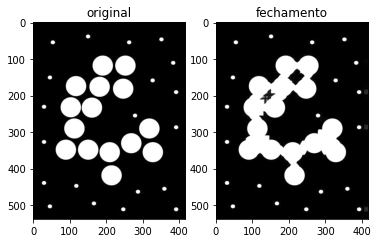

In [23]:
#escolha da imagem e elemento estruturante

img = image2
elemento = cv2.getStructuringElement(cv2.MORPH_CROSS, (25, 25))

#operação de fechamento
fechamento = cv2.morphologyEx(img, cv2.MORPH_CLOSE, elemento)

plt.subplot(1, 2, 1), plt.imshow(img, 'gray'),plt.title('original')
plt.subplot(1, 2, 2), plt.imshow(fechamento, 'gray'),plt.title('fechamento')
plt.show()

### Observação do efeito das operações na imagem 3:
- Na erosão acontece o separamento de componentes ligados
- Na abertura é possível observar que os componentes abertos pela erosão não foram fechados na dilatação que se seguiu na operação 

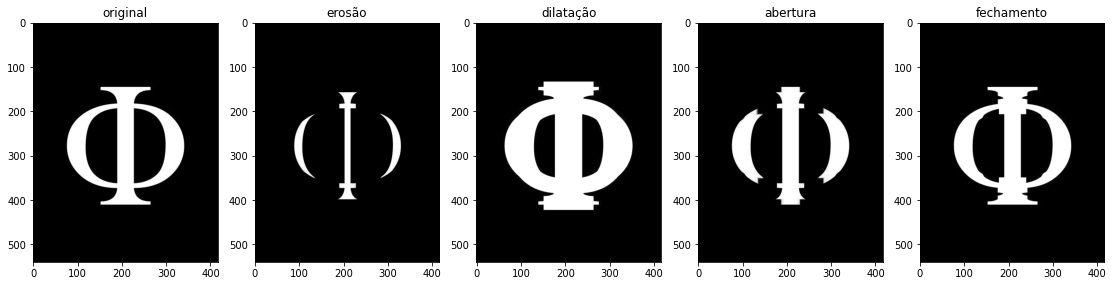

In [24]:
img = image3

#operações morfológicas na imagem 3
erosao = cv2.erode(img, elemento)
dilatacao = cv2.dilate(img, elemento)
abertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, elemento)
fechamento = cv2.morphologyEx(img, cv2.MORPH_CLOSE, elemento)

#plotagem dos resultados
image = plt.figure(figsize=(6.4 * 3, 4.8 * 3), constrained_layout=False)

ax1 = image.add_subplot(1,5,1)
ax1.imshow(img, 'gray'),plt.title('original')

ax2 = image.add_subplot(1,5,2)
ax2.imshow(erosao, 'gray'),plt.title('erosão')

ax3 = image.add_subplot(1,5,3)
ax3.imshow(dilatacao, 'gray'),plt.title('dilatação')

ax4 = image.add_subplot(1,5,4)
ax4.imshow(abertura, 'gray'),plt.title('abertura')

ax5 = image.add_subplot(1,5,5)
ax5.imshow(fechamento, 'gray'),plt.title('fechamento')
plt.show()



---


# Bibliografia

- GONZALEZ, Rafael C.; WOODS, Richard E. Processamento de imagens digitais. Editora Blucher, 2000

- https://sites.google.com/arapiraca.ufal.br/tacito-neves-ufal/home?authuser=0

- https://github-wiki-see.page/m/cmdiniz/Tutorial_OpenCV/wiki/Operações-morfológicas

- https://www.inf.ufpr.br/lesoliveira/download/morfologia.pdf
